In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
use_intermediate_results=True

In [2]:
!wget https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/chuanjie/.wget-hsts'. HSTS will be disabled.
--2019-03-12 22:09:33--  https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.68.133
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.68.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255717535 (244M) [text/plain]
Saving to: ‘MetObjects.csv.2’

MetObjects.csv.2    100%[===================>] 243.87M  17.8MB/s    in 21s     

2019-03-12 22:09:58 (11.6 MB/s) - ‘MetObjects.csv.2’ saved [255717535/255717535]



In [3]:
museum=pd.read_csv('./MetObjects.csv')

/home/chuanjie/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7,8,9,10,11,18,27,28,29,30,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Dataset and motivation slide

Description of the dataset:

To the extent possible under law, The Metropolitan Museum of Art has waived all copyright and related or neighboring rights to this dataset using Creative Commons Zero. This work is published from: The United States Of America. You can also find the text of the CC Zero deed in the file LICENSE in this repository. These select datasets are now available for use in any media without permission or fee; they also include identifying data for artworks under copyright. The datasets support the search, use, and interaction with the Museum’s collection.

The main attributes of the dataset are:
- **Object Number/Object ID**: a unique number sequence for each object in museum.
- **Is Highlight**: a bool to show whether an object is highlighted or not.
- **Is Public domain**: a bool to show whether an object is displayed in public domain or not.
- **Department**: the department the object belongs to.
- **Object name**: how the object called.
- **Title**: detailed object name with discription.
- **Culture/Period/Dynasty/Reign**: the background of each object.
- **Portfolio**: the portfolio the object belongs to.
- **Artist Pole/Artist Prefix/Artist Display Name/Artist Display Bio/Artist Suffix/Artist Alpha Sort/Artist Nationality/Artist Begin Date/Artist End Date**: all detailed artist background.
- **Object Date/Object Begin Date/Object End Date**: the display period of each object.
- **Medium**: the materials used to make the items.
- **Dimensions**: the dimension of each object.
- **Credit Line**: the credit information of each object.
- **Classification**: the category of material each objects belongs to.

## Literature review:
https://cloud.google.com/blog/products/gcp/when-art-meets-big-data-analyzing-200000-items-from-the-met-collection-in-bigquery

And here is what they made but we have not:

"Labels by time period"
To start, let’s JOIN the time period for each piece of art from our metadata table with the labels returned by the Cloud Vision API’s label detection method. This query will give us the top 3 labels for each time period

"Analyzing the image data"
Because art is visual, our analysis can only go so far by looking at metadata. We’ve got images for 200,000 pieces of art - that’s a lot of pixels! I took one image for each of our 200,000 pieces and sent it to the Cloud Vision API. Then I took the Cloud Vision API’s JSON response and stored the result in a BigQuery table. This gives us lots of information on each piece of art: what’s in the image, where the image can be found on the web, urls of similar images, and more. For details on how I processed these images, check out this post.



In [4]:
museum

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository,Tags
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,3/11/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY",NaN
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,3/11/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY",NaN
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,3/11/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY",NaN
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,3/11/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY",NaN
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,3/11/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY",NaN
5,67.265.12,False,False,6,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/6,3/11/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY",NaN
6,67.265.13,False,False,7,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/7,3/11/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY",Birds|Coins
7,67.265.14,False,False,8,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/8,3/11/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY",Inscriptions|Men|Profiles|Coins
8,67.265.15,False,False,9,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/9,3/11/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY",NaN
9,1979.486.3,False,False,10,American Decorative Arts,Coin,Two-and-a-half-dollar Indian Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/10,3/11/2019 8:00:00 AM,"Metropolitan Museum of Art, New York, NY",NaN


## Research Question
We are trying to solve the problems in real-world as follows:

1.Count the production time of each artwork to get the distributions of these in the timeline.

Input:the column 'artist begin date'.

Output:the visual of the numbers of the artists by the timeline.

2.Count the origins of each artwork to get the distributions of the artworks in the world.

Input:the column 'Region'.

Output:the visual which plots the top ten amounts of the location.

3.Count the number of medium of the objects.

Input:the column 'Medium'.

Output:the visual which plots the top twenty amounts of the medium.


So,there are three important attributes which should be collected from the dataframe:location time and medium.

Because that,we just need several columns.

In [5]:
museum=museum[['Artist Begin Date','Region','Medium','Is Highlight','Is Public Domain']].copy()
museum.head(50)

,Artist Begin Date,Region,Medium,Is Highlight,Is Public Domain
0,1794,NaN,Gold,False,False
1,1785,NaN,Gold,False,False
2,NaN,NaN,Gold,False,False
3,NaN,NaN,Gold,False,False
4,NaN,NaN,Gold,False,False
5,NaN,NaN,Gold,False,False
6,NaN,NaN,Gold,False,False
7,NaN,NaN,Gold,False,False
8,NaN,NaN,Gold,False,False
9,1867,NaN,Gold,False,False


Here are the types of every columns:

In [6]:
museum.dtypes

Artist Begin Date    object
Region               object
Medium               object
Is Highlight           bool
Is Public Domain       bool
dtype: object

All of them have wrong datatypes.But first,we should solve the NaN value in every column.

Let's finish the first goal:Count the production time of each artwork to get the distributions of these in the timeline.

First,we need to clean the values in this column,and in it there are two main problems:NaN value and two time values in one row.

In [7]:
museum['Artist Begin Date'].unique()

array(['1794      ', '1785      ', nan, ..., '1840      |1854      ',
       '1855      |1849      |1849      |1850      ',
       '1849      |1849      |1877      |1874      '], dtype=object)

In [8]:
museum=museum.fillna({'Artist Begin Date':0})
artist_date=[]
for i in range(len(museum['Artist Begin Date'])):
    if type(museum['Artist Begin Date'][i])==int:
        pass
    else:
        museum['Artist Begin Date'][i]=museum['Artist Begin Date'][i][:4]
        artist_date.append(int(museum['Artist Begin Date'][i]))

/home/chuanjie/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


KeyboardInterrupt: 

Because the running time is too long(2 hours),so we keep the results in a csv file --artist _date.csv

In [9]:
!wget https://github.com/tcj1995/final-project/blob/master/artist%20_date.csv

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/chuanjie/.wget-hsts'. HSTS will be disabled.
--2019-03-16 21:06:58--  https://github.com/tcj1995/final-project/blob/master/artist%20_date.csv
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘artist _date.csv.2’

artist _date.csv.2      [ <=>                ]  49.48K  --.-KB/s    in 0.07s   

2019-03-16 21:06:59 (695 KB/s) - ‘artist _date.csv.2’ saved [50670]



In [10]:
date=pd.read_csv('./artist _date.csv')
artist_date=[]
for i in range(len(date)):
    artist_date.append(date['1794'][i])


After cleaning,let's change the type of this column.

In [11]:
museum['Artist Begin Date']=museum['Artist Begin Date'].astype(int)

ValueError: invalid literal for int() with base 10: '1746      |1774      '

In [12]:
museum.dtypes

Artist Begin Date    object
Region               object
Medium               object
Is Highlight           bool
Is Public Domain       bool
dtype: object

Now,we want to see the exactly number of artists in every year.

In [13]:
set_date=set(artist_date)
d={}
for item in set_date:
     d.update({item:artist_date.count(item)})
a = sorted(d.items(), key=lambda x: x[1], reverse=True)
a.sort()

From the sorted result,we find that some numbers is too small to be caught in the plot,so we decide to use the numbers which are big to make the graph.

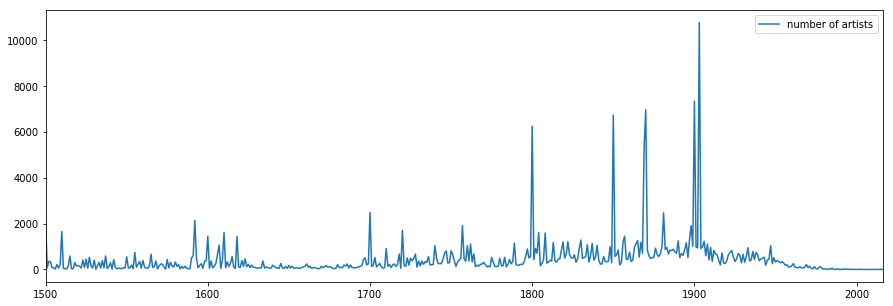

In [14]:
for k in reversed(range(len(a))):
    if a[k][0]<1500:
        a.remove(a[k])
    else:
        pass
summary_statistics_tenmax_artist_year=a[:]
year=[]
number=[]
for i in range(len(summary_statistics_tenmax_artist_year)):
    year.append(summary_statistics_tenmax_artist_year[i][0])
    number.append(summary_statistics_tenmax_artist_year[i][1])
df_1=pd.DataFrame(number,year,columns=['number of artists'])
df_1.plot(figsize=(15,5))

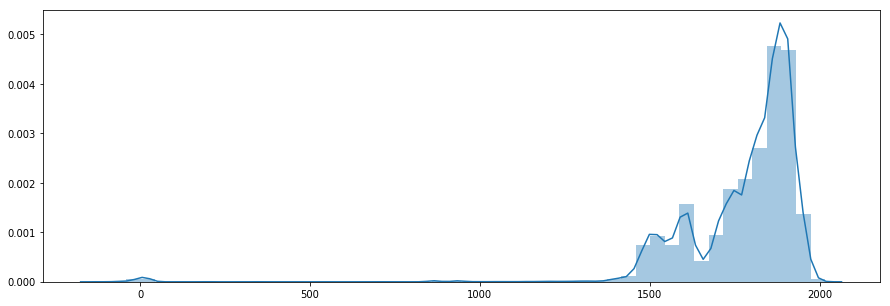

In [15]:
plt.figure(figsize=(15,5))
sns.distplot(artist_date)